In [1]:
import pandas as pd
import seaborn as sns
data_file = pd.ExcelFile('ECT.xlsx')

In [2]:
PartyList = data_file.parse(sheet_name='result_constituencies_PartyList', header=0)
Candidate = data_file.parse(sheet_name='result_constituencies_Candidate', header=0, usecols=[0,2,3,4,5])

In [3]:
#Candidate['cons_id'].value_counts()
#PartyList['cons_id'].value_counts()

In [4]:
result_All = pd.merge(PartyList,Candidate, on=('cons_id','party_id'), how='outer')
#print(result_All['cons_id'].value_counts()[result_All['cons_id'].value_counts()>67])

In [5]:
unique_result = [list(set( result_All[result_All['cons_id']=='CMI_7']['party_id'] ) - set ( PartyList[PartyList['cons_id']=='CMI_7']['party_id']))[0],
                list(set( result_All[result_All['cons_id']=='NMA_1']['party_id'] ) - set ( PartyList[PartyList['cons_id']=='NMA_1']['party_id']))[0],
                list(set( result_All[result_All['cons_id']=='PNB_4']['party_id'] ) - set ( PartyList[PartyList['cons_id']=='PNB_4']['party_id']))[0],
                list(set( result_All[result_All['cons_id']=='CMI_6']['party_id'] ) - set ( PartyList[PartyList['cons_id']=='CMI_6']['party_id']))[0]]

In [6]:
result_All = result_All.drop(result_All.index[result_All['party_id']==unique_result[1]])
result_All = result_All.drop(result_All.index[result_All['party_id']==unique_result[2]])
result_All = result_All.drop(result_All.index[result_All['party_id']==unique_result[3]])

In [7]:
#print(result_All[result_All['party_list_vote_percent']>99])
result_All = result_All.drop(result_All.index[result_All['cons_id']=='NST_6'])

In [8]:
#print(result_All[result_All['mp_app_vote_percent']>99])

In [12]:
result_All_party_id_726 = result_All[result_All['party_id']==726]
result_All_party_id_726 = result_All_party_id_726[['cons_id','party_list_vote_percent','mp_app_vote_percent']]

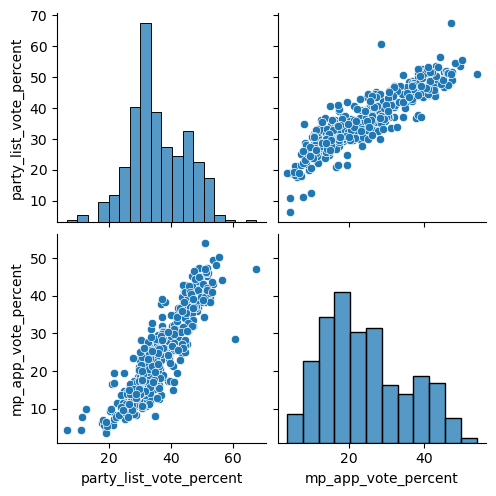

In [15]:
sns.pairplot(result_All_party_id_726)